In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\scien\\OneDrive\\Documents\\GitHub\\Python_Poineers_Team2'

In [35]:
#Reading the cleaned data 
DATA_PATH = "data/covid_python_Dec25.csv"  # adjust if needed
df = pd.read_csv(DATA_PATH, dtype={"week": "string"}, low_memory=False)

#df.head()

In [36]:
# Keep only numeric weeks (drop NR and other non-numeric)
df_week = df[df["week"].str.isnumeric()].copy()

# Convert week to integer for proper sorting
df_week["week"] = df_week["week"].astype(int)


In [37]:
responses_by_week = (
    df[df["week"] != "NR"]
    .groupby("week")
    .size()
    .reset_index(name="response_count")
)


<p style="font-family: Cambria; font-size: 18px;"><i>
  <strong><br>1. How many survey responses were collected over time<br></strong>
  <p style="font-family: Cambria; font-size: 16px;">  
  <strong>Reasoning:<br></strong>This shows how participation changed week-to-week or month-to-month and helps identify peaks or drops in survey activity. 
  It also provides context for interpreting trends in symptoms and probable cases over the same period.</i>
</p>

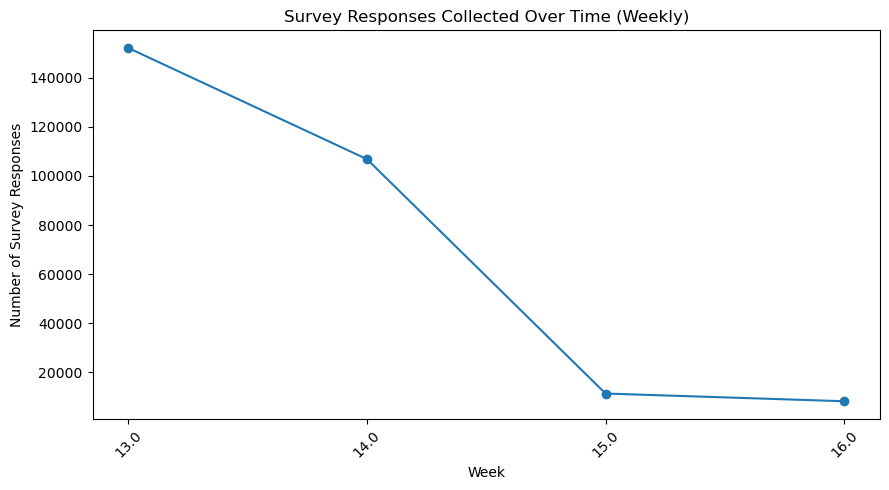

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(
    responses_by_week["week"],
    responses_by_week["response_count"],
    marker="o"
)

plt.xlabel("Week")
plt.ylabel("Number of Survey Responses")
plt.title("Survey Responses Collected Over Time (Weekly)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 18px;"><i>
  <strong><br>2. Which geographic areas (FSA) submitted the most responses<br>
 <p style="font-family: Cambria; font-size: 16px;">
Reasoning:</strong>
  This helps identify regions with the highest engagement and highlights areas that may be overrepresented or underrepresented.
Understanding geographic response patterns supports targeted outreach and regional analysis.
</p>

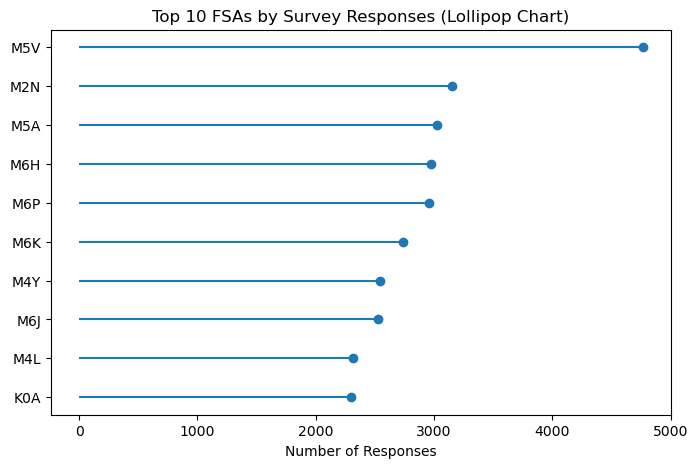

In [115]:
top_fsa = df['fsa'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.hlines(
    y=top_fsa.index,
    xmin=0,
    xmax=top_fsa.values
)
plt.plot(top_fsa.values, top_fsa.index, "o")

plt.xlabel("Number of Responses")
plt.title("Top 10 FSAs by Survey Responses (Lollipop Chart)")
plt.gca().invert_yaxis()
plt.show()


<p style="font-family: Cambria; font-size: 18px;"><i>
  <strong><br>3. What percentage of respondents were classified as probable COVID cases<br></strong>
    <p style="font-family: Cambria; font-size: 16px;">
  <strong>Reasoning:<br></strong>
  This provides an overall estimate of COVID burden within the surveyed population. 
  It serves as a baseline metric for comparing risk across time periods, regions, and demographic groups.
</p>

In [62]:
probable_rate = (df['probable'] == 'y').mean() * 100
print(f"Probable COVID rate: {probable_rate:.2f}%")

Probable COVID rate: 4.44%


<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong><br>4. How prevalent were key COVID-19 symptoms<br></strong>
    <p style="font-family: Cambria; font-size: 16px;">
  <strong>Reasoning:<br></strong>
 Symptom prevalence helps identify the most commonly reported clinical indicators of COVID. 
  This supports screening strategies and validates whether reported symptoms align with known disease pattrns.
</p>

In [112]:
symptoms = [
    'fever_chills_shakes',
    'cough',
    'shortness_of_breath'
]

prevalence = (df[symptoms] == 'y').mean().sort_values(ascending=False)

prevalence
prevalence.round(2)


cough                  0.03
shortness_of_breath    0.02
fever_chills_shakes    0.01
dtype: float64

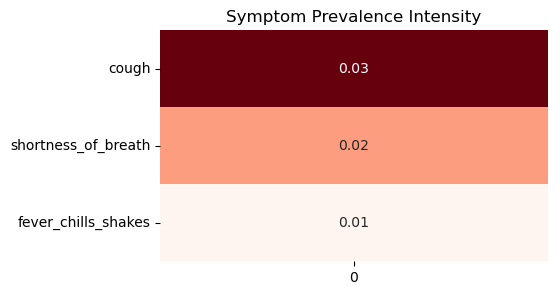

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.heatmap(
    prevalence.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="Reds",
    cbar=False
)

plt.title("Symptom Prevalence Intensity")
plt.show()


<p style="font-family: Cambria; font-size: 18px;"> <i>
  <strong><br>5. How many respondents reported multiple symptoms<br></strong>
    <p style="font-family: Cambria; font-size: 16px;">
  <strong>Reasoning:<br></strong>
Reporting multiple symptoms often indicates higher likelihood of infection or more severe illness. 
  This information helps prioritize individuals for testing, isolation guidance, and follow-up care.
</p>

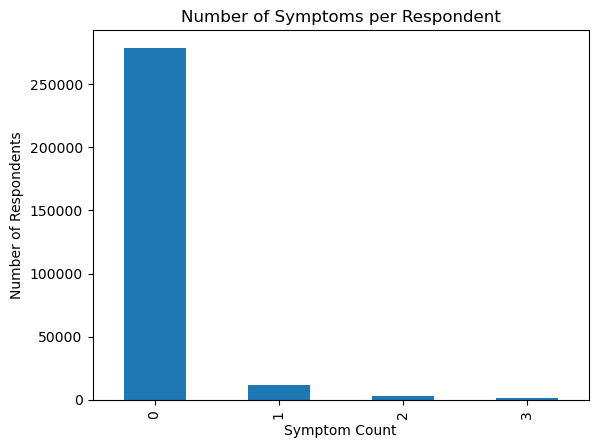

In [73]:
df['symptom_count'] = (df[symptoms] == 'y').sum(axis=1)

df['symptom_count'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Symptoms per Respondent")
plt.xlabel("Symptom Count")
plt.ylabel("Number of Respondents")
plt.show()

<p style="font-family: Cambria; font-size: 18px;"> <i>
  <strong><br>6. What proportion of respondents were classified as vulnerable<br></strong>
  <p style="font-family: Cambria; font-size: 16px;">
    <strong>Reasoning:<br></strong>
Identifying the size of the vulnerable population helps assess overall risk and guides prioritization of protective measures. 
  This is critical for allocating healthcare resources and public health support effectively.
</p>

In [76]:
vulnerable_rate = (df['vulnerable'] == 'y').mean() * 100
print(f"Vulnerable population: {vulnerable_rate:.2f}%")

Vulnerable population: 26.73%


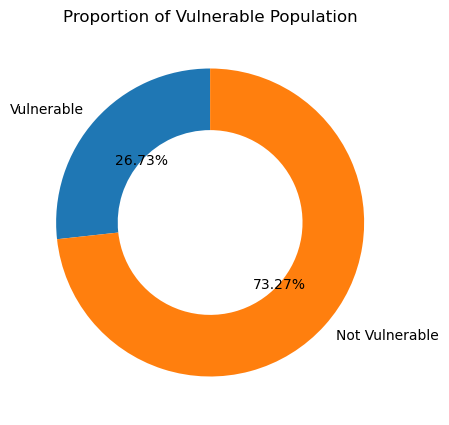

In [118]:
import matplotlib.pyplot as plt

labels = ['Vulnerable', 'Not Vulnerable']
sizes = [vulnerable_rate, 100 - vulnerable_rate]

plt.figure(figsize=(5,5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.title("Proportion of Vulnerable Population")
plt.show()


<p style="font-family: Cambria; font-size: 18px;"> <i>
  <strong><br>7. How common were pre-existing medical conditions<br></strong>
    <p style="font-family: Cambria; font-size: 16px;">
  <strong>Reasoning:<br></strong>
 Pre-existing medical conditions increase the risk of complications and often contribute to vulnerability classification. 
  Understanding their prevalence helps explain risk patterns and supports targeted intervention strategies.
</p>

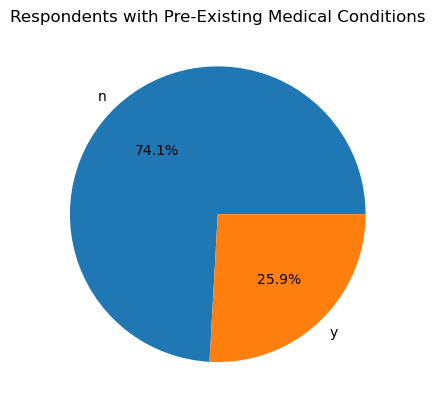

In [93]:
df['any_medical_conditions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Respondents with Pre-Existing Medical Conditions")
plt.ylabel("")
plt.show()